In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

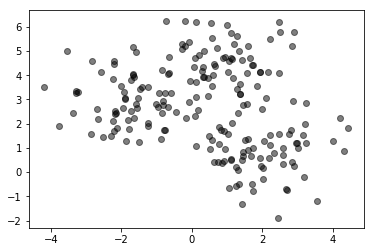

In [2]:
N = 200
k = 3
X, y = make_blobs(n_samples=N, n_features=2,
                  centers=k, random_state=0)
plt.scatter(X[:,0], X[:,1], color='k', alpha=0.5, edgecolor='k')
plt.show()

In [3]:
def assign(distance, closest, X, u_t, k):
    for j in range(k):
        distance[:,j] = np.sqrt((X[:,0] - u_t[j][0])**2 + (X[:,1] - u_t[j][1])**2)
    for i in range(len(X)):
        closest[i] = np.argmin(distance[i,])

def update(distance, closest, u_t, k):
    for i in range(k):
        x = X[closest == i, 0]
        y = X[closest == i, 1]
        if x.size > 0 and y.size > 0:
            u_t[i][0] = np.mean(x)
            u_t[i][1] = np.mean(y)
            
def KMEANS(X, k, show=False):
    distance = np.zeros(shape=(len(X),k))
    closest = np.zeros(len(X))
    u_t = X[np.random.choice(N, k)]
    while True:
        closest_c = np.copy(closest)
        update(distance, closest, u_t, k)
        assign(distance, closest, X, u_t, k)
        if np.array_equal(closest_c, closest):
            break
    if show:
        colmap = ['r','g','b']
        colors = [colmap[int(i)] for i in closest]
        plt.scatter(X[:,0], X[:,1], color=colors, alpha=0.5, edgecolor='k')
        for i in range(k):
            plt.scatter(u_t[i][0], u_t[i][1], color=colmap[i]) 
        plt.show()
    return closest


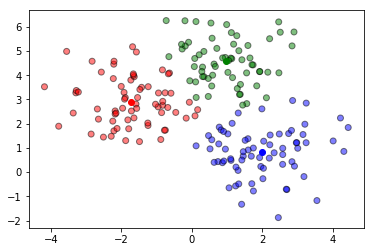

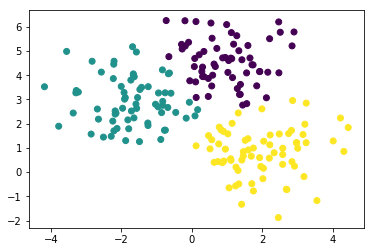

In [4]:
from sklearn.cluster import KMeans
KMEANS(X, k, show=True)
a = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.clf()
plt.scatter(X[:,0],X[:,1], c=a)

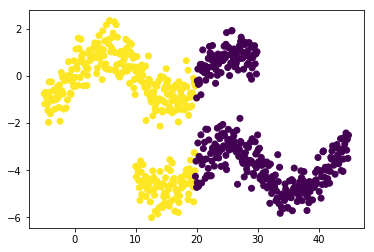

In [5]:
# алгоритм не будет работать при невыпуклых данных
x = np.arange(-5, 30, 0.1)
y = np.sin(0.3 * x)

x2 = np.arange(10, 45, 0.1)
y2 = -1 * np.cos(0.3 * x) - 4

noise = 0.5 * np.random.randn(len(x))
y += noise
y2 += noise

X = np.concatenate((x, x2))
Y = np.concatenate((y, y2))

plt.clf()
N = len(X)
x = [[X[i], Y[i]] for i in range(N)]
a = KMeans(n_clusters=2, random_state=0).fit_predict(x)
plt.scatter(X, Y, c=a)


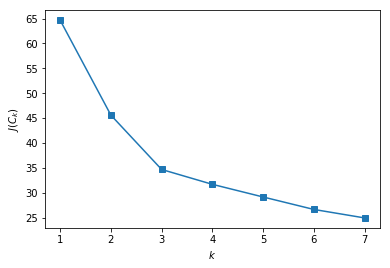

In [6]:
# самый простой пример выбора числа кластеров, при некотором k кривая начнет "не сильно" изменяться
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=N, n_features=2,
                  centers=k, random_state=0)
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [7]:
import time
N = 10
k = 3
X_l = []
Y_l = []
for i in range(1, 7):
    X_l.append(N**i)
    X, y = make_blobs(n_samples=N**i, n_features=2,
                  centers=k, random_state=0)
    time1 = time.time()
    KMEANS(X, k)
    time2 = time.time()
    Y_l.append((time2 - time1) * 1000)

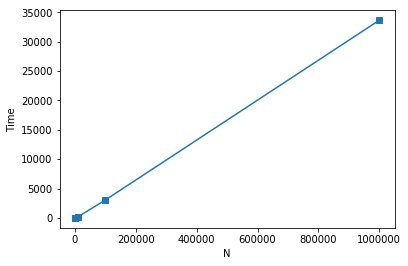

In [8]:
# время выполнение от объема данных
plt.clf()
plt.xlabel("N")
plt.ylabel("Time")
plt.plot(np.array(X_l), np.array(Y_l).astype(int), marker='s')
plt.show()